In [17]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Preprocessing: Standardizing and excluding the target variable 'Adaptivity Level'

data = pd.read_csv("../../data/01-modified-data/New_students_adaptability.csv")
features = data.drop(['Adaptivity Level'], axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [7]:
# Applying PCA
pca = PCA()
pca.fit(scaled_features)

PCA()

In [8]:
# Calculating the cumulative explained variance ratio to determine the optimal number of components
cumulative_variance_ratio = pca.explained_variance_ratio_.cumsum()

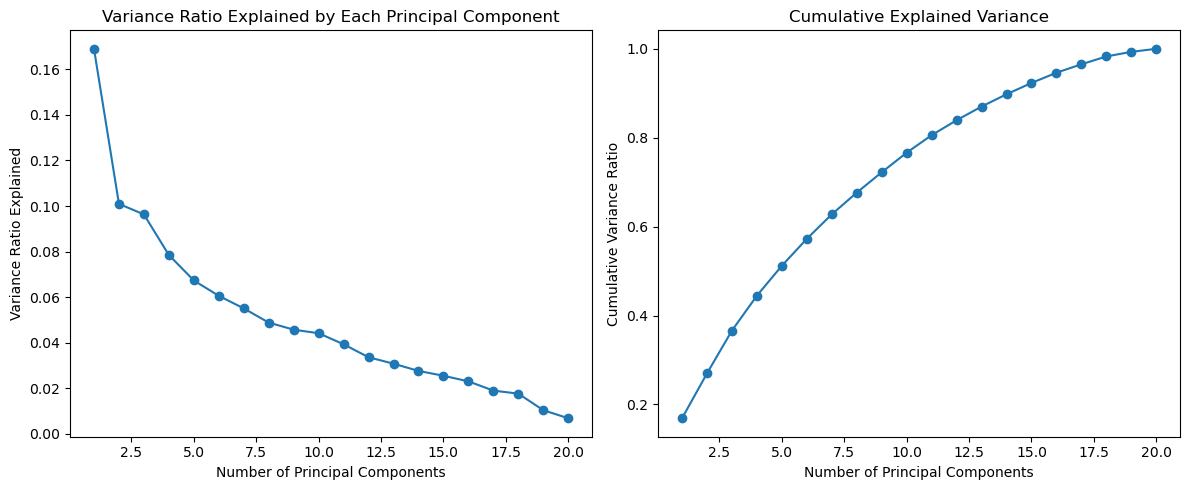

In [10]:
# Visualization for the above analysis
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Variance Ratio Explained by Each Principal Component')
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance Ratio Explained')

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Ratio')

plt.tight_layout()
plt.show()

In [11]:
# Determining the number of components that explain at least 95% of the variance
var_threshold = 0.95
components_for_threshold = (cumulative_variance_ratio >= var_threshold).argmax() + 1

print(components_for_threshold)


17


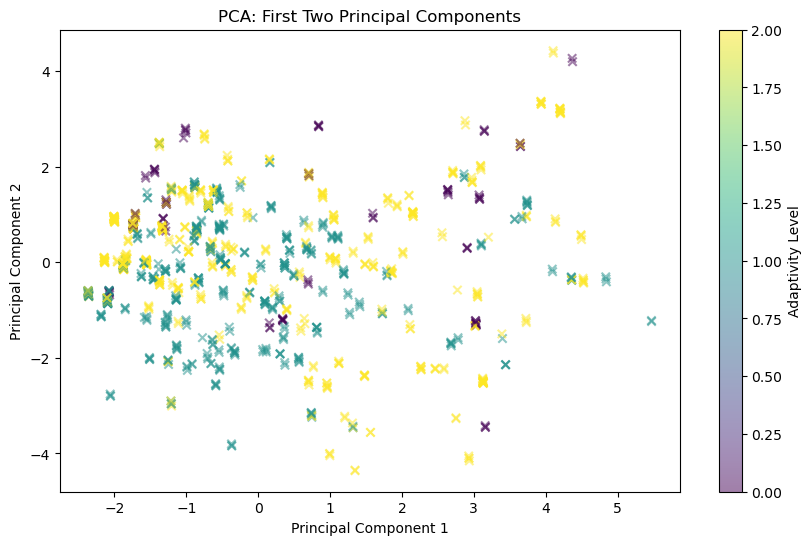

In [16]:
# Visualiza the transformed dataset using the first 17 principal components
data_pca = PCA(n_components=components_for_threshold)
reduced_data = data_pca.fit_transform(scaled_features)

reduced_df = pd.DataFrame(reduced_data, columns=[f'PC{i+1}' for i in range(components_for_threshold)])

# the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(reduced_df['PC1'], reduced_df['PC2'], c=data['Adaptivity Level'], cmap='viridis', alpha=0.5, marker= 'x')
plt.title('PCA: First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Adaptivity Level')
plt.show()


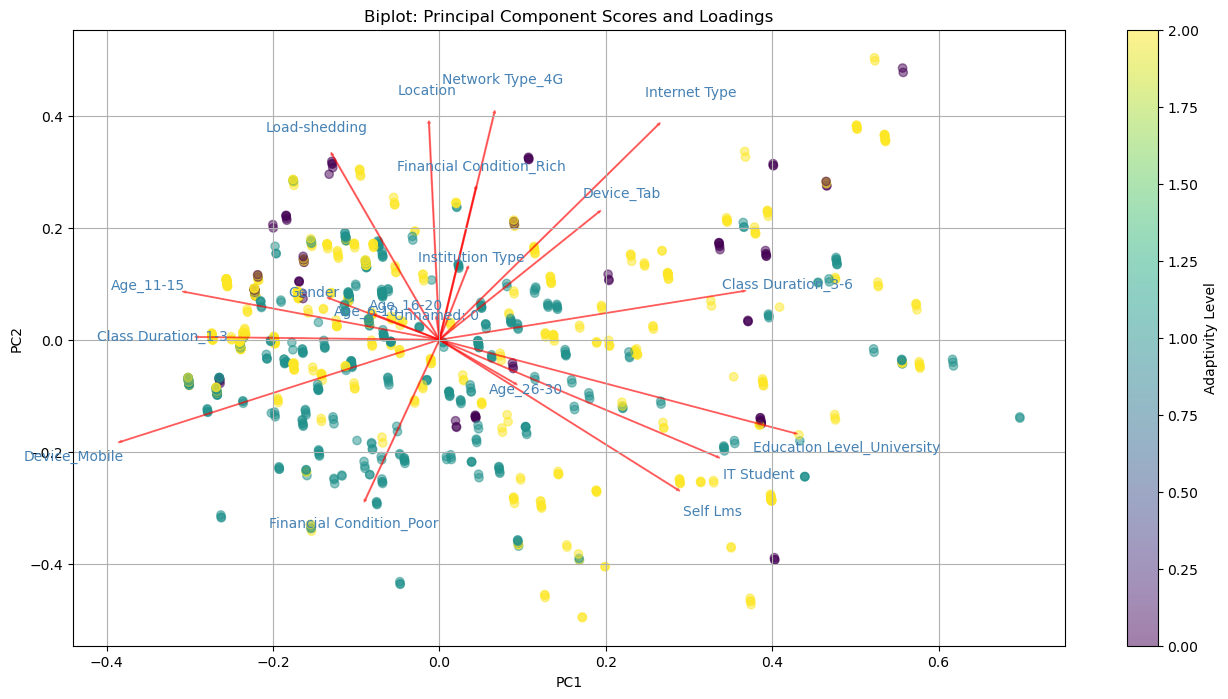

In [24]:
# biplot

def biplot(score, coeff, labels=None):

    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]

    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())

    plt.scatter(xs * scalex, ys * scaley, c=data['Adaptivity Level'], cmap='viridis', alpha=0.5)

    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5)
        if labels is not None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color='steelblue', ha='center', va='center')

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.title('Biplot: Principal Component Scores and Loadings')
    plt.grid()


pca_biplot = PCA(n_components=2)
biplot_scores = pca_biplot.fit_transform(scaled_features)
biplot_coeff = pca_biplot.components_.T
feature_labels = list(features.columns)

plt.figure(figsize=(16, 8))
biplot(biplot_scores, biplot_coeff, labels=feature_labels)
plt.colorbar(label='Adaptivity Level')
plt.show()
